# 00 | EDA - Configuración General

1. Carga de librerías.

2. Seteo de estilos del notebook.

3. Ingesta del dataset.

In [32]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'utils')))
import utils as ut

In [3]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [4]:
wines = pd.read_csv("../src/data/transformed/wines_transformed.csv")
pd.set_option('display.max_columns', None)
wines.head(3)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Giménez,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,NaN,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.000,0.000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.14,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,NaN,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 01 | Distribución de Datos Numéricos
- Esta sección se enfoca en analizar la distribución de variables numéricas para comprender valores habituales y atípicos, densidad de valores y estadísticas descriptivas generales.

## Rating
- ¿Cuales son los ratings más comunes?
- ¿El rating se relaciona con la cantidad de ratings?
- ¿El rating es un buen parámetro para la recomendación de vinos?
<br>
<br>
---

In [5]:
wines[["rating", "rating_qty"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,2026.0,4.012192,0.280431,2.9,3.90,4.0,4.2,4.8
rating_qty,1606.0,735.927148,1276.337340,25.0,107.25,277.0,769.0,18091.0


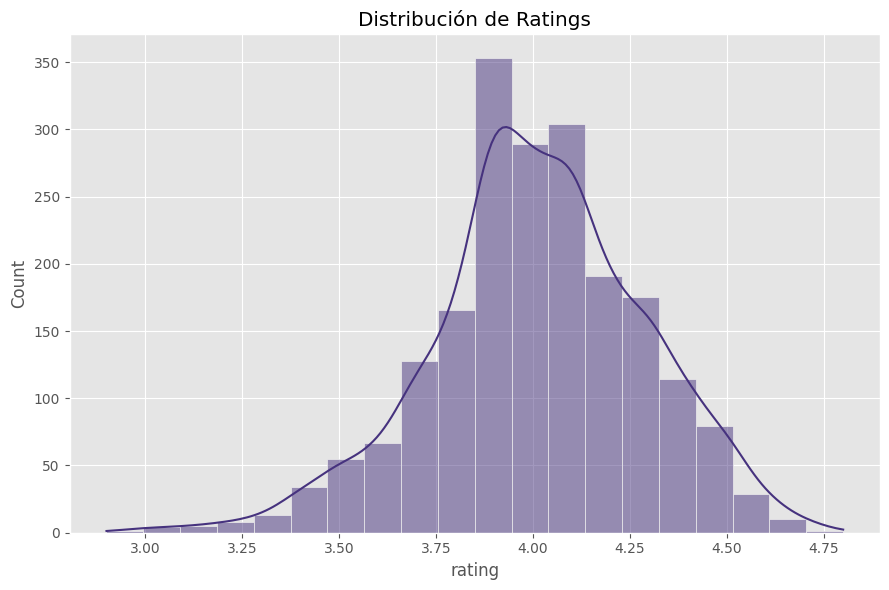

In [6]:
sns.histplot(wines['rating'], bins=20, kde=True)
plt.title('Distribución de Ratings')

plt.tight_layout()
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

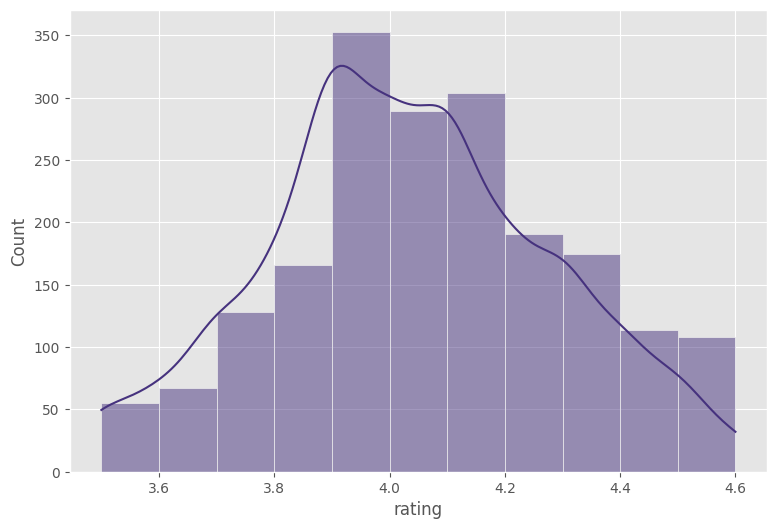

In [7]:
no_outlier_rating = ut.manage_outlier_IQR(df=wines["rating"], func="remove")
sns.histplot(no_outlier_rating, binwidth=0.1, kde=True)

<Axes: xlabel='rating_qty', ylabel='Count'>

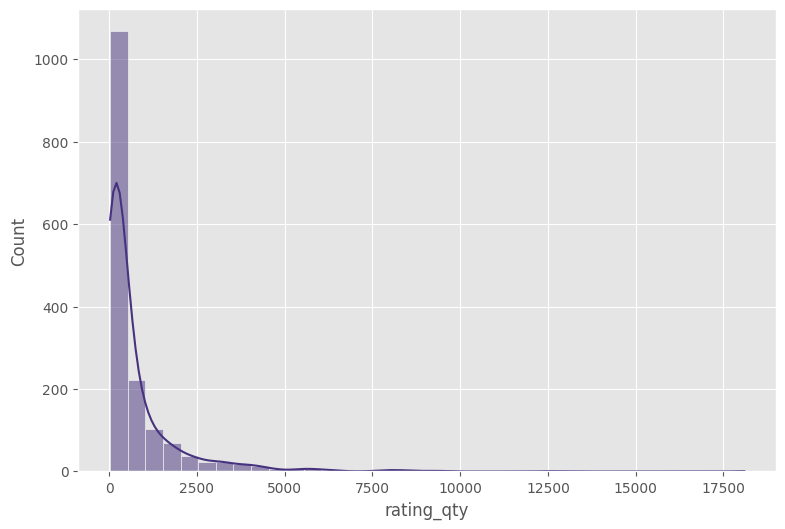

In [8]:
sns.histplot(wines, x="rating_qty", binwidth=500, kde=True)

<Axes: xlabel='rating_qty', ylabel='Count'>

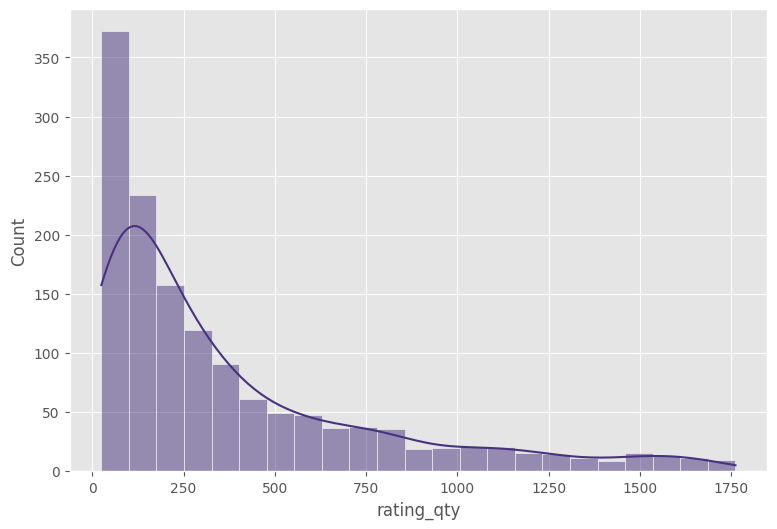

In [9]:
no_outlier_rating_qty = ut.manage_outlier_IQR(df=wines["rating_qty"], func="remove")
sns.histplot(no_outlier_rating_qty, kde=True)

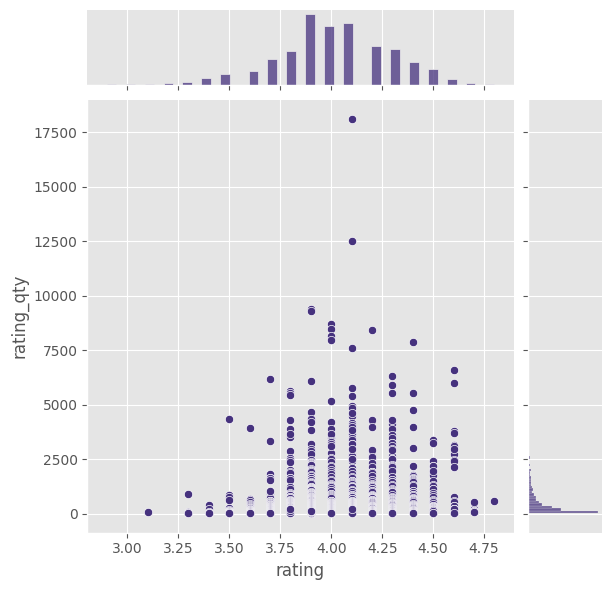

In [10]:
sns.jointplot(data=wines, x="rating", y="rating_qty")

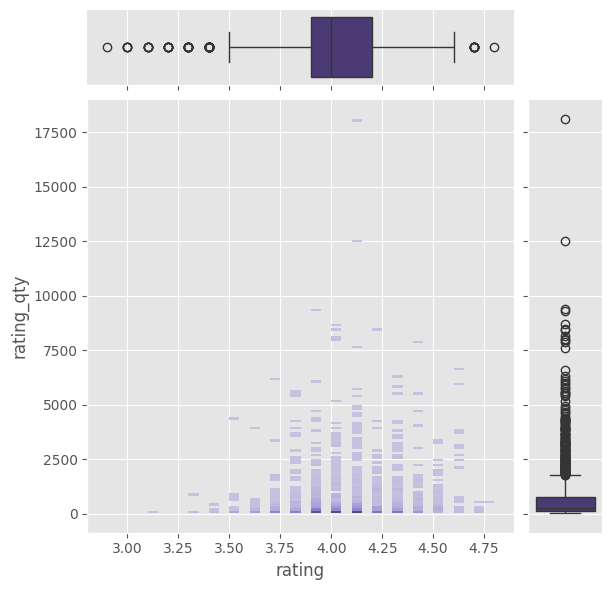

In [11]:
g = sns.JointGrid(data=wines, x="rating", y="rating_qty")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

## Price

- ¿Qué sería un vino caro y uno barato?
- ¿Nuestro dataset contiene muchos vinos caros o más baratos?
- ¿Los vinos más caros son mejores que los baratos?
- ¿Los existe algún equilibrio entre precio/calidad óptimo?
<br>
<br>
---

In [12]:
pd.DataFrame(wines["price"]).describe().T

,count,mean,std,min,25%,50%,75%,max
price,2009.0,44.952374,62.63628,6.55,19.17,25.0,44.04,1438.99


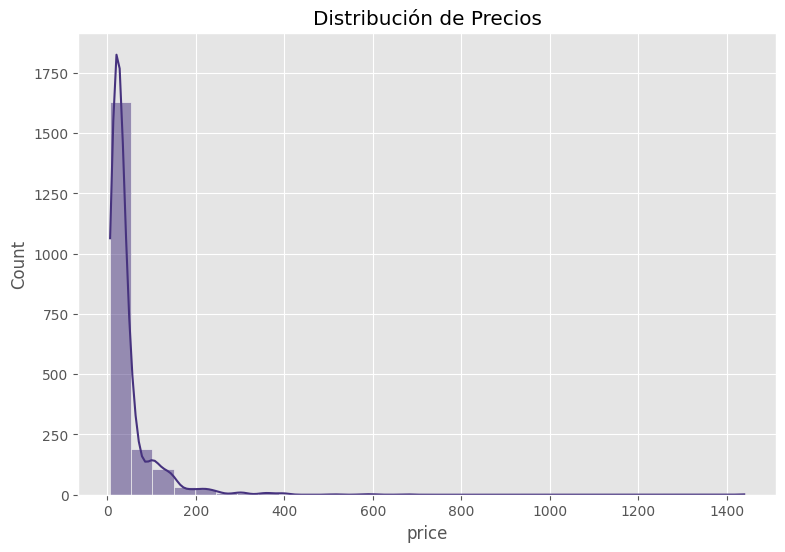

In [13]:
sns.histplot(wines['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

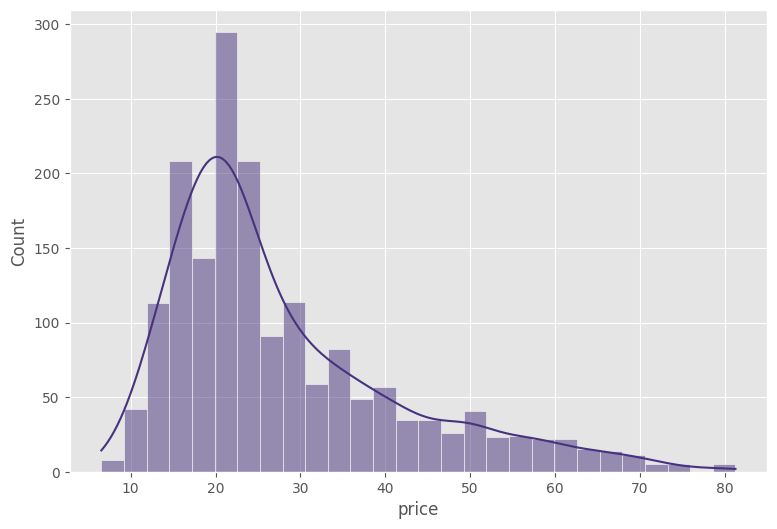

In [14]:
no_outlier_price = ut.manage_outlier_IQR(df=wines["price"], func="remove")
sns.histplot(no_outlier_price, kde=True)

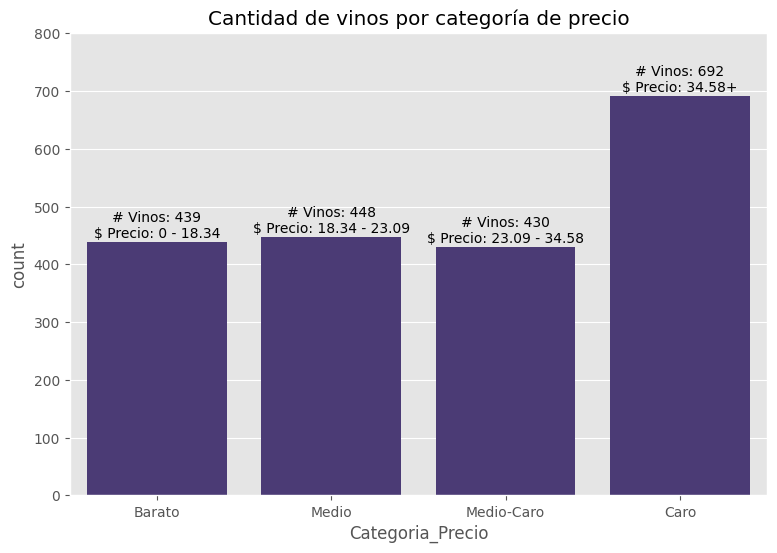

In [15]:
cheap_threshold = no_outlier_price.quantile(0.25)
mid_threshold = no_outlier_price.quantile(0.5)
expensive_threshold = no_outlier_price.quantile(0.75)

def categorizar_precio(p, cheap, mid, exp):
    if p <= cheap_threshold:
        return "Barato"
    elif ((p > cheap) & (p <= mid)):
        return "Medio"
    elif ((p > mid) & (p <= exp)):
        return "Medio-Caro"
    elif p > exp:
        return "Caro"
    else:
        return "Desconocido"

wines['Categoria_Precio'] = wines['price'].apply(
    lambda p: categorizar_precio(p, cheap_threshold, mid_threshold, expensive_threshold)
)

categorias_precio = ['Barato', 'Medio', 'Medio-Caro', 'Caro']

categories_map = {
    "Barato": f"0 - {round(cheap_threshold,2)}",
    "Medio": f"{round(cheap_threshold,2)} - {round(mid_threshold,2)}",
    "Medio-Caro": f"{round(mid_threshold,2)} - {round(expensive_threshold,2)}",
    "Caro": f"{round(expensive_threshold,2)}+"
}

ax = sns.countplot(
    data=wines,
    x='Categoria_Precio',
    order=categorias_precio,
)

ax.set_ylim(0, 800)

for p, categoria in zip(ax.patches, categorias_precio):
    height = p.get_height()
    price_range = categories_map[categoria]

    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 2, 
        f'# Vinos: {int(height)}\n$ Precio: {price_range}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Cantidad de vinos por categoría de precio")
plt.show()

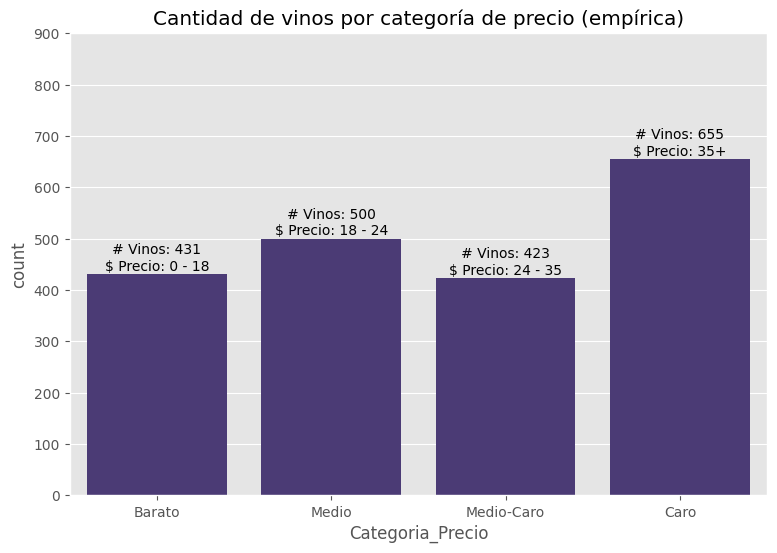

In [16]:
cheap_threshold = 18
mid_threshold = 24
expensive_threshold = 35

wines['Categoria_Precio'] = wines['price'].apply(
    lambda p: categorizar_precio(p, cheap_threshold, mid_threshold, expensive_threshold)
)

categorias_precio = ['Barato', 'Medio', 'Medio-Caro', 'Caro']

categories_map = {
    "Barato": f"0 - {round(cheap_threshold,2)}",
    "Medio": f"{round(cheap_threshold,2)} - {round(mid_threshold,2)}",
    "Medio-Caro": f"{round(mid_threshold,2)} - {round(expensive_threshold,2)}",
    "Caro": f"{round(expensive_threshold,2)}+"
}

ax = sns.countplot(
    data=wines,
    x='Categoria_Precio',
    order=categorias_precio,
)

ax.set_ylim(0, 900)

for p, categoria in zip(ax.patches, categorias_precio):
    height = p.get_height()
    price_range = categories_map[categoria]

    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 2, 
        f'# Vinos: {int(height)}\n$ Precio: {price_range}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Cantidad de vinos por categoría de precio (empírica)")
plt.show()

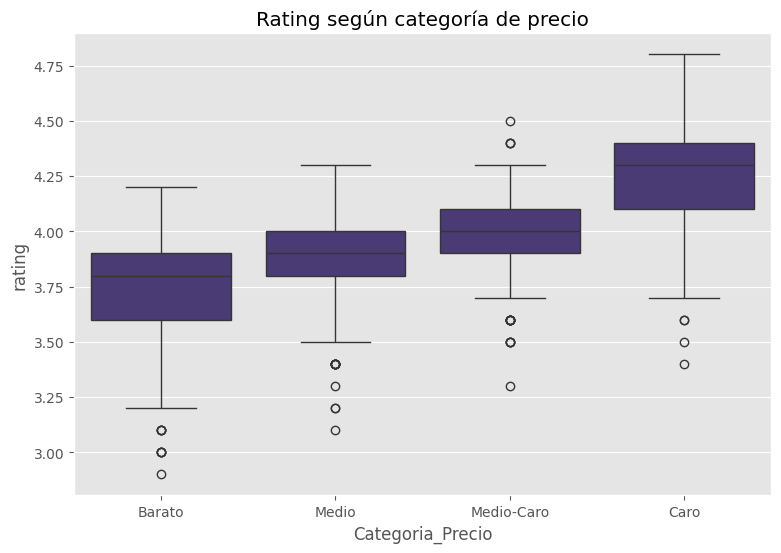

Categoria_Precio
Barato         3.753828
Caro           4.265191
Desconocido    3.988235
Medio          3.896600
Medio-Caro     4.021277
Name: rating, dtype: float64

In [17]:
sns.boxplot(data=wines, x='Categoria_Precio', y='rating', order=categorias_precio)
plt.title("Rating según categoría de precio")
plt.show()

wines.groupby('Categoria_Precio')['rating'].mean()


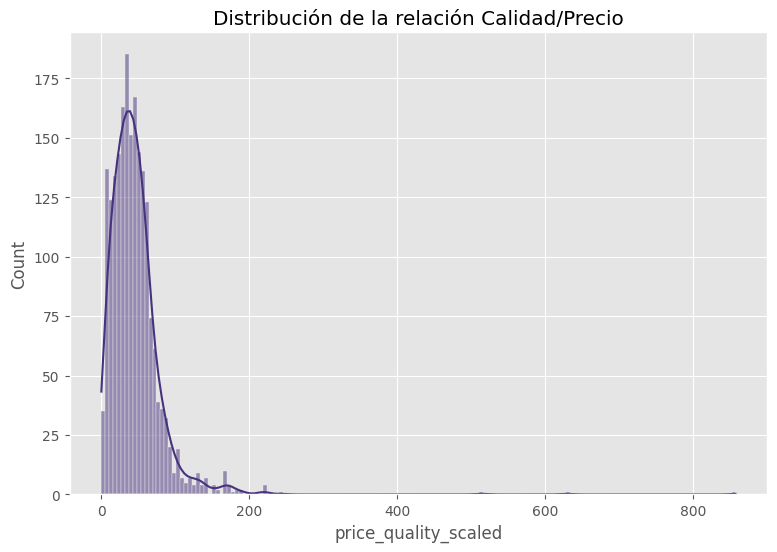

In [44]:
scaler = MinMaxScaler()

wines[["rating_scaled", "price_scaled"]] = scaler.fit_transform(wines[["rating", "price"]])

wines['price_quality_scaled'] = wines['rating_scaled'] / wines['price_scaled']
wines[['rating', 'price', 'price_quality_scaled']].sort_values(by='price_quality_scaled', ascending=False).head(10)
sns.histplot(wines['price_quality_scaled'], kde=True)
plt.title("Distribución de la relación Calidad/Precio")
plt.show()


In [45]:
wines_filtrados = wines[wines['price'] > 0].copy()
wines_filtrados['price_quality_scaled'] = wines_filtrados['price'] / wines_filtrados['rating']
top_vinos_cp = wines_filtrados.sort_values(by='price_quality_scaled', ascending=False).head(10)
top_vinos_cp[['name', 'price', 'rating', 'rating_scaled', 'price_scaled', 'price_quality_scaled']]


,name,price,rating,rating_scaled,price_scaled,price_quality_scaled
1635,Appellation En Fuego Malbec,1438.99,4.1,0.631579,1.000000,350.973171
1,Estiba Reservada,675.00,4.7,0.947368,0.466651,143.617021
7,Cobos Viña Cobos Malbec,599.99,4.7,0.947368,0.414286,127.657447
2,Estiba Reservada,580.00,4.7,0.947368,0.400331,123.404255
17,Adrianna Vineyard Mundus Bacillus Terrae Malbec,514.00,4.6,0.894737,0.354256,111.739130
1160,Adrianna Vineyard Mundus Bacillus Terrae Malbec,395.00,4.6,0.894737,0.271181,85.869565
15,Adrianna Vineyard Mundus Bacillus Terrae Malbec,395.00,4.6,0.894737,0.271181,85.869565
4,Cobos Volturno,399.99,4.7,0.947368,0.274664,85.104255
1145,Cobos Volturno,399.99,4.7,0.947368,0.274664,85.104255
1195,Adrianna Vineyard Mundus Bacillus Terrae Malbec,367.49,4.5,0.842105,0.251976,81.664444


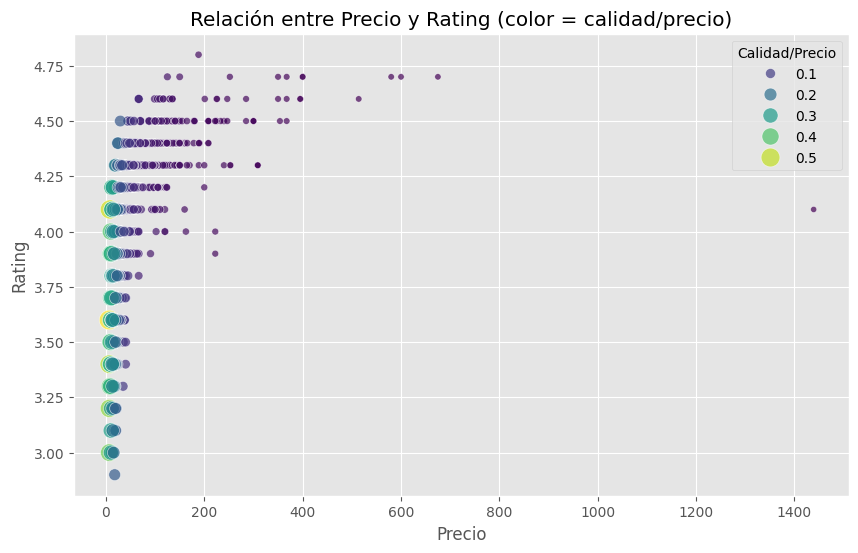

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wines_filtrados, x='price', y='rating', hue='Calidad_Precio',
                palette='viridis', size='Calidad_Precio', sizes=(20, 200), alpha=0.7)

plt.title('Relación entre Precio y Rating (color = calidad/precio)')
plt.xlabel('Precio')
plt.ylabel('Rating')
plt.legend(title='Calidad/Precio')
plt.grid(True)
plt.show()


## Relaciones entre caracteristicas de los vinos y maridajes

- Relaciones entre perfiles de sabor y maridajes
- Notas de sabor más frecuentes y su relación con maridajes
- Patrones entre tipos de uva y maridajes comunes

<br>
<br>
---


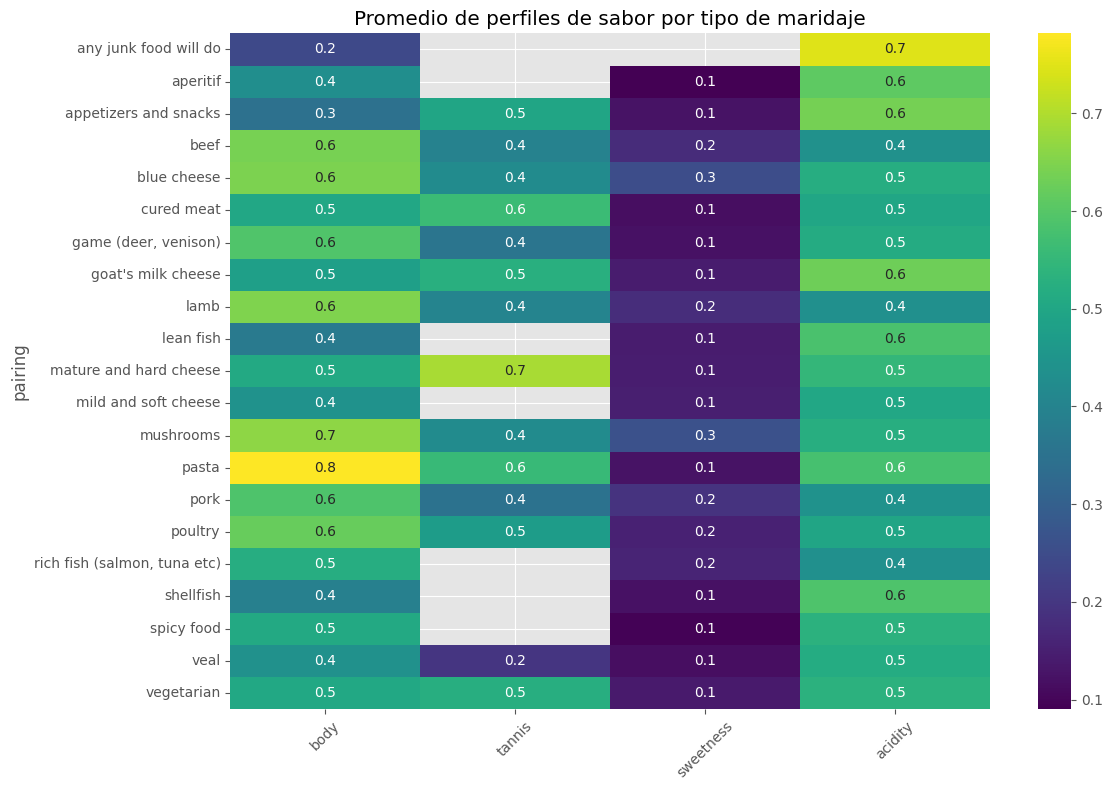

In [21]:
taste_cols = ['body', 'tannis', 'sweetness', 'acidity']

pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]
melted = wines.melt(id_vars=taste_cols, 
                    value_vars=pairing_cols,
                    var_name='pairing',
                    value_name='is_present')

melted = melted[melted['is_present'] == 1]

taste_by_pairing = melted.groupby('pairing')[taste_cols].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(taste_by_pairing, annot=True, cmap="viridis", fmt=".1f")
plt.title("Promedio de perfiles de sabor por tipo de maridaje")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



/tmp/ipykernel_1199/1563244771.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=note_means.values, y=note_means.index, palette="viridis")


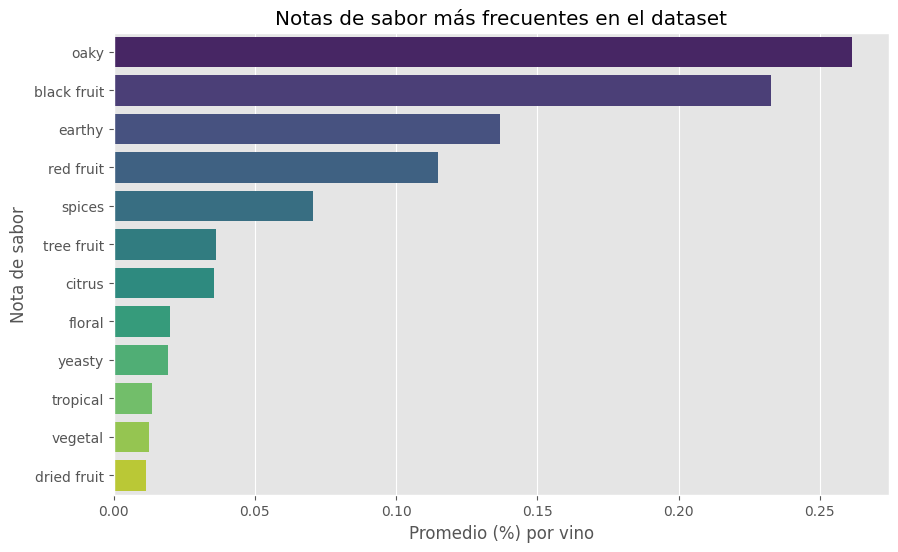

In [22]:
notes_cols = [
    'black fruit', 'citrus', 'dried fruit', 'earthy', 'floral', 'oaky',
    'red fruit', 'spices', 'tree fruit', 'tropical', 'vegetal', 'yeasty'
]
note_means = wines[notes_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=note_means.values, y=note_means.index, palette="viridis")
plt.title("Notas de sabor más frecuentes en el dataset")
plt.xlabel("Promedio (%) por vino")
plt.ylabel("Nota de sabor")
plt.show()



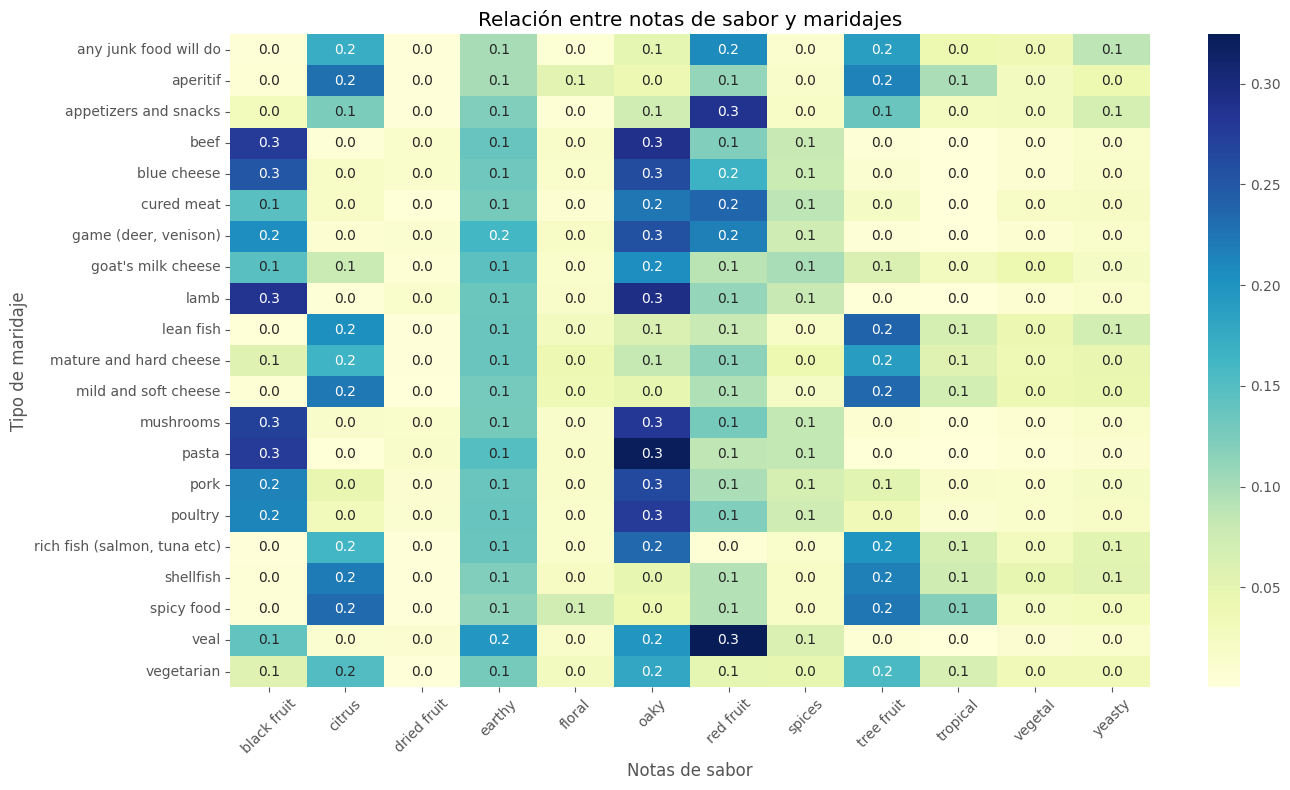

In [23]:
melted_notes = wines.melt(id_vars=notes_cols, 
                          value_vars=pairing_cols,
                          var_name='pairing',
                          value_name='is_present')


melted_notes = melted_notes[melted_notes['is_present'] == 1]
notes_by_pairing = melted_notes.groupby('pairing')[notes_cols].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(notes_by_pairing, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Relación entre notas de sabor y maridajes")
plt.xlabel("Notas de sabor")
plt.ylabel("Tipo de maridaje")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


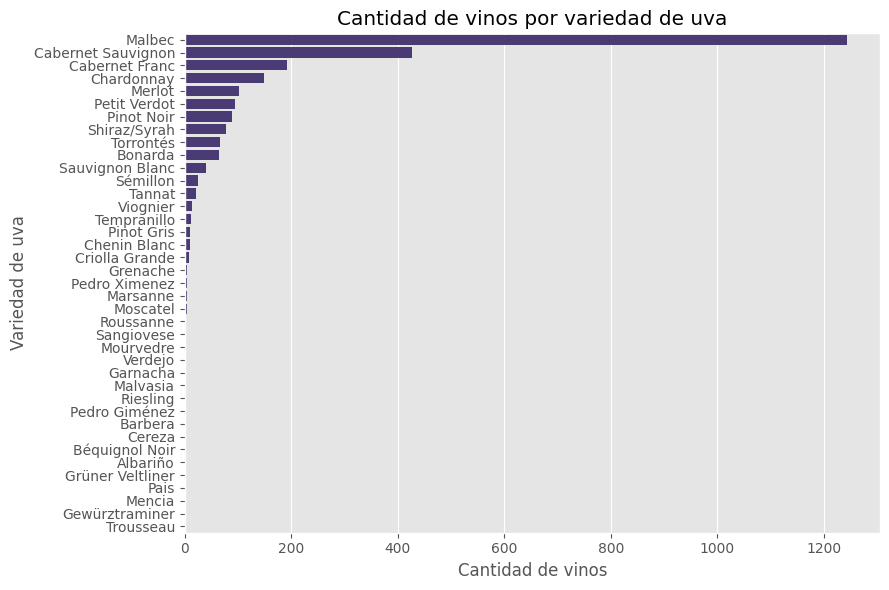

In [24]:
grape_cols = [
    'Albariño', 'Barbera', 'Bonarda', 'Béquignol Noir', 'Cabernet Franc', 'Cabernet Sauvignon',
    'Cereza', 'Chardonnay', 'Chenin Blanc', 'Criolla Grande', 'Garnacha', 'Gewürztraminer',
    'Grenache', 'Grüner Veltliner', 'Malbec', 'Malvasia', 'Marsanne', 'Mencia', 'Merlot',
    'Moscatel', 'Mourvedre', 'Pais', 'Pedro Giménez', 'Pedro Ximenez', 'Petit Verdot',
    'Pinot Gris', 'Pinot Noir', 'Riesling', 'Roussanne', 'Sangiovese', 'Sauvignon Blanc',
    'Shiraz/Syrah', 'Sémillon', 'Tannat', 'Tempranillo', 'Torrontés', 'Trousseau',
    'Verdejo', 'Viognier'
]
grape_counts = wines[grape_cols].sum().sort_values(ascending=False)
sns.barplot(x=grape_counts.values, y=grape_counts.index)
plt.title("Cantidad de vinos por variedad de uva")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Variedad de uva")
plt.tight_layout()
plt.show()


In [25]:
grape_counts_df = wines[grape_cols].sum().sort_values(ascending=False).reset_index()
grape_counts_df.columns = ['Variedad de uva', 'Cantidad de vinos']
from IPython.display import display

display(grape_counts_df)


,Variedad de uva,Cantidad de vinos
0,Malbec,1243.0
1,Cabernet Sauvignon,427.0
2,Cabernet Franc,191.0
3,Chardonnay,149.0
4,Merlot,101.0
5,Petit Verdot,95.0
6,Pinot Noir,89.0
7,Shiraz/Syrah,77.0
8,Torrontés,66.0
9,Bonarda,65.0


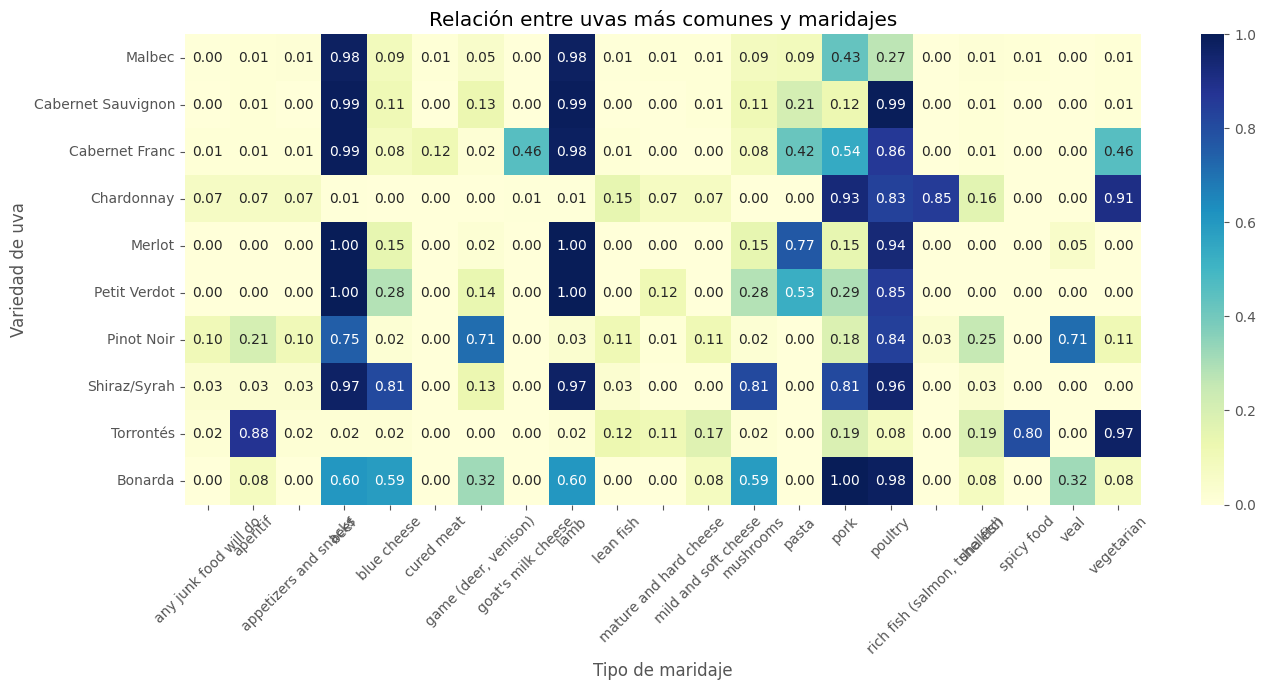

In [26]:
grapes_melted = wines.melt(id_vars=pairing_cols,
                           value_vars=grape_cols,
                           var_name='grape',
                           value_name='is_grape')


grapes_melted = grapes_melted[grapes_melted['is_grape'] == 1]
grape_pairing_freq = grapes_melted.groupby('grape')[pairing_cols].mean()
top_grapes = wines[grape_cols].sum().sort_values(ascending=False).head(10).index.tolist()
heatmap_data = grape_pairing_freq.loc[top_grapes]

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relación entre uvas más comunes y maridajes")
plt.xlabel("Tipo de maridaje")
plt.ylabel("Variedad de uva")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Relacion: Precio/calidad con maridajes y tambien con tipo de uva


In [27]:
pairings_top_cp_transposed = pairings_top_cp.T
pairings_top_cp_transposed.columns = top_vinos_cp['name'].values

pairings_long = pairings_top_cp_transposed.reset_index().melt(id_vars='index')
pairings_long.columns = ['Pairing', 'Wine', 'Value']
pairings_long = pairings_long[pairings_long['Value'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=pairings_long, y='Pairing', hue='Wine', palette="viridis")
plt.title("Maridajes de los Top 10 vinos con mejor relación Calidad/Precio")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Maridaje")
plt.legend(title="Vino", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


NameError: name 'pairings_top_cp' is not defined

ValueError: Unknown format code 'd' for object of type 'float'

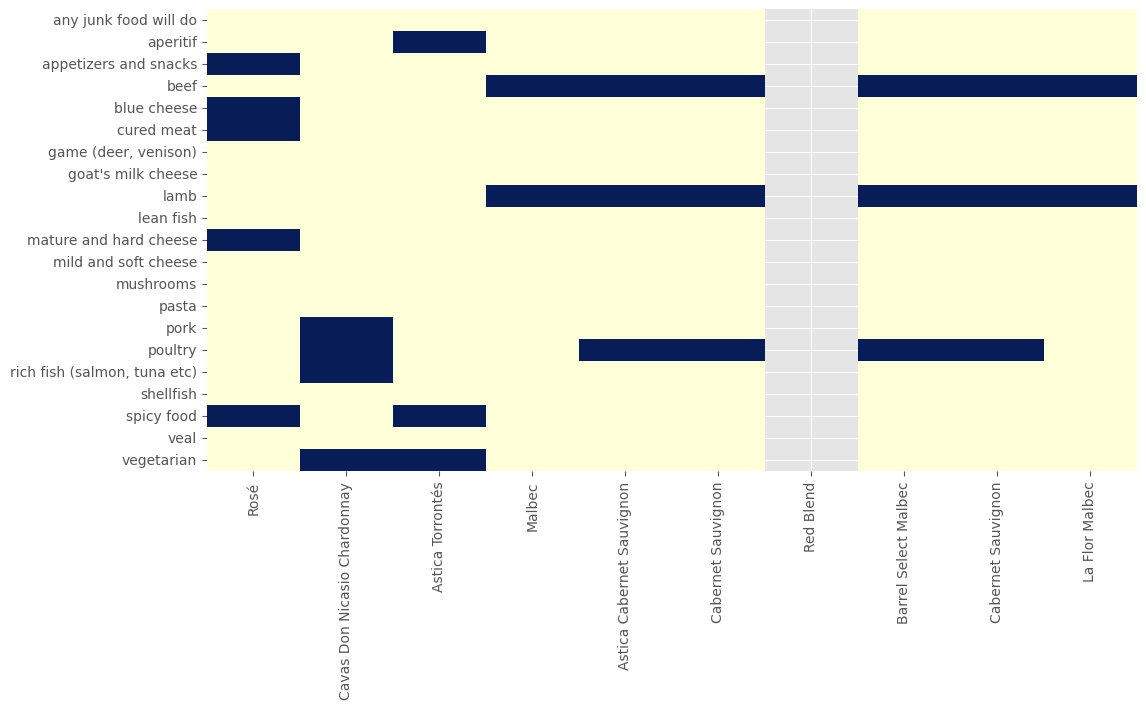

In [ ]:
pairings_top_cp = top_vinos_cp[pairing_cols]


plt.figure(figsize=(12, 6))
sns.heatmap(pairings_top_cp.T, cmap="YlGnBu", cbar=False, annot=True, fmt="d",
            yticklabels=pairing_cols, xticklabels=top_vinos_cp['name'].values)
plt.title("Top 10 vinos con mejor relación Calidad/Precio y sus maridajes")
plt.xlabel("Nombre del vino")
plt.ylabel("Maridaje")
plt.tight_layout()
plt.show()


/tmp/ipykernel_1148/1033618434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grapes_top_cp['Wine'] = top_vinos_cp['name'].values
/tmp/ipykernel_1148/1033618434.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairings_top_cp['Wine'] = top_vinos_cp['name'].values


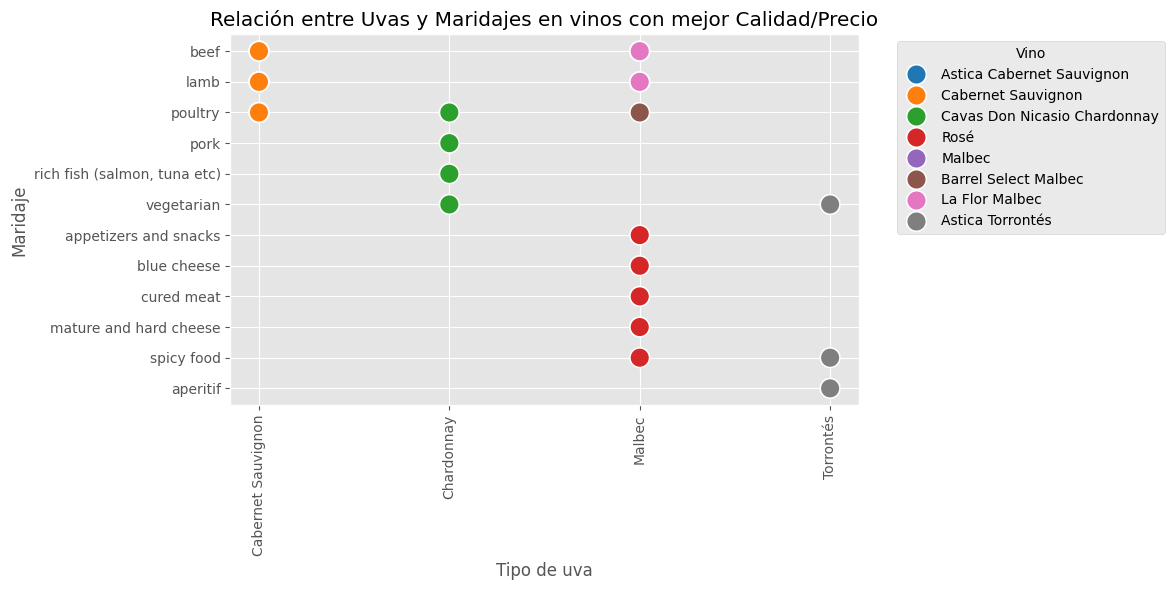

In [ ]:
grapes_top_cp = top_vinos_cp[grape_cols]
grapes_top_cp['Wine'] = top_vinos_cp['name'].values
grapes_long = grapes_top_cp.melt(id_vars='Wine', var_name='Grape', value_name='HasGrape')

grapes_long = grapes_long[grapes_long['HasGrape'] == 1]
pairings_top_cp = top_vinos_cp[pairing_cols]
pairings_top_cp['Wine'] = top_vinos_cp['name'].values

pairings_long = pairings_top_cp.melt(id_vars='Wine', var_name='Pairing', value_name='HasPairing')
pairings_long = pairings_long[pairings_long['HasPairing'] == 1]

wine_grape_pairing = pd.merge(grapes_long[['Wine', 'Grape']], pairings_long[['Wine', 'Pairing']], on='Wine')
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=wine_grape_pairing,
    x='Grape',
    y='Pairing',
    hue='Wine',
    s=200, 
    palette="tab10"
)

plt.xticks(rotation=90)
plt.title("Relación entre Uvas y Maridajes en vinos con mejor Calidad/Precio")
plt.xlabel("Tipo de uva")
plt.ylabel("Maridaje")
plt.legend(title="Vino", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
